# Exploratory data analysis and visualization of Coursera Course data set

### Tasks:
- Download the data from Kaggle.
- Load the data using Pandas.
- Perform data cleaning by:
  - Handling missing values.
  - Removing duplicate samples and features.
  - Treating the outliers.
- Perform exploratory data analysis. Your analysis should provide answers to these questions:
  - How many observations are there in this dataset?
  - How many features this dataset has?
  - Which of the features are categorical?
  - Which of the features are numeric?
  - Are there any artists that have more than 1 popular track? If yes, which and how many?
  - Who was the most popular artist?
  - How many artists in total have their songs in the top 50?
  - Are there any albums that have more than 1 popular track? If yes, which and how many?
  - How many albums in total have their songs in the top 50?
  - Which tracks have a danceability score above 0.7?
  - Which tracks have a danceability score below 0.4?
  - Which tracks have their loudness above -5?
  - Which tracks have their loudness below -8?
  - Which track is the longest?
  - Which track is the shortest?
  - Which genre is the most popular?
  - Which genres have just one song on the top 50?
  - How many genres in total are represented in the top 50?
  - Which features are strongly positively correlated?
  - Which features are strongly negatively correlated?
  - Which features are not correlated?
  - How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
  - How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
  - How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, the results you got, and what these results mean.
- Provide suggestions for how your analysis could be improved.


### Importing libraries

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



#import os; print(os.getcwd())
#!pipreqs c:\Users\blockchain\Documents\turing_college
#!jupyter nbconvert --to script *.ipynb
#!pipreqs .

[NbConvertApp] Converting notebook visualization.ipynb to script
[NbConvertApp] Writing 625 bytes to visualization.py
INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in .\requirements.txt


### Loading data from Kaggle

In [112]:
# An alternative way to download datasets from kaggle
# For this you have to install: pip install kaggle 
# Create API token ~\.kaggle\kaggle.json

import kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('siddharthm1698/coursera-course-dataset', path= '.', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset


In [113]:
df = pd.read_csv('coursea_data.csv', index_col=0).sort_index()
df

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480k
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310k
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350k
...,...,...,...,...,...,...
886,Understanding Modern Finance,American Institute of Business and Economics,SPECIALIZATION,4.4,Intermediate,11k
887,Object-Oriented Design,University of Alberta,COURSE,4.7,Intermediate,33k
888,Aprende a programar con Python,Universidad Austral,SPECIALIZATION,4.2,Beginner,6.6k
889,Погружение в Python,Moscow Institute of Physics and Technology,COURSE,4.7,Intermediate,45k


### Data cleaning

In [114]:
df['course_students_enrolled'] = (
    df['course_students_enrolled']
    .str.replace('k', '*1_000')
    .str.replace('m', '*1_000_000')
    .map(eval)
)


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    float64
dtypes: float64(2), object(4)
memory usage: 48.7+ KB


No NaNs were found, so no actions were required.

In [116]:
df.describe().map(
    lambda x: '{:,.2f}'.format(x).rstrip('0').rstrip('.')
)

,course_rating,course_students_enrolled
count,891,891
mean,4.68,"90,552.08"
std,0.16,"181,936.45"
min,3.3,"1,500"
25%,4.6,"17,500"
50%,4.7,"42,000"
75%,4.8,"99,500"
max,5,"3,200,000"


### Removing duplicated samples and features

In [117]:

duplicate_rows = df[df.duplicated()]
duplicate_rows

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled



No duplicated rows were found, so no actions were required.

In [118]:
del duplicate_rows

In [119]:
duplicate_columns = df.columns[df.columns.duplicated()]
duplicate_columns

Index([], dtype='object')


No duplicated columns were found, so no actions were required.

In [120]:
del duplicate_columns

### Treating outliers

In [121]:
numerical_features

Index(['course_rating', 'course_students_enrolled'], dtype='object')

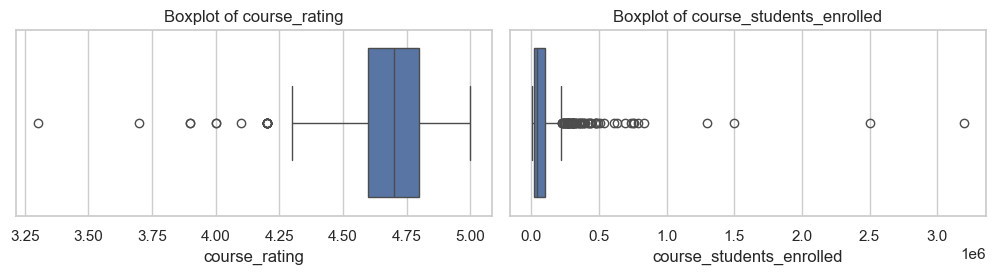

In [122]:
# Visualize the distribution of numerical features to identify outliers
numerical_features = df.select_dtypes(include=[np.number]).columns

# Plot boxplots for numerical features in a grid view
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [125]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.
